# Data Cleaning

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
dataset = pd.read_csv("../../datasets/openpowerlifting.csv")
dataset.head(20)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [3]:
# Understand dataset
dataset[
    (dataset["MeetID"] == 0) & (dataset["Division"] == "Open Senior") & (dataset["Sex"] == "F")
    ].groupby(["MeetID", "Sex", "Equipment", "Division", "WeightClassKg"])["Place"].sum()

MeetID  Sex  Equipment   Division     WeightClassKg
0       F    Multi-ply   Open Senior  82.5             1
             Raw         Open Senior  60               1
                                      67.5             1
                                      90               1
             Single-ply  Open Senior  60               1
             Wraps       Open Senior  67.5             1
                                      75               1
                                      82.5             1
Name: Place, dtype: object

In [4]:
# Examine dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [5]:
# Get unique values in Place column
dataset["Place"].unique()

array(['1', '2', 'DQ', '3', 'G', '4', '5', '6', '7', '8', '9', '10', '11',
       'NS', nan, '15', '13', '14', '12', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', 'DD', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77'], dtype=object)

In [6]:
# Convert Place column onto numeric
dataset["Place"] = pd.to_numeric(dataset["Place"], errors='coerce')

In [7]:
# Fill NA values with 0
dataset["Place"] = dataset["Place"].fillna(0)

In [8]:
# Get unique values in Place column after updated NA with 0
dataset["Place"].unique()

array([ 1.,  2.,  0.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 15.,
       13., 14., 12., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

In [9]:
dataset["Age"].unique()

array([47. , 42. , 18. , 28. , 60. , 52. , 24. , 56. , 54. , 17. , 32. ,
       25. , 22. , 30. , 44. , 34. , 20. , 36. , 27. , 23. , 49. , 21. ,
       40. , 35. , 39. , 37. , 59. , 19. , 45. , 66. , 43. , 61. , 58. ,
       53. , 31. , 51. , 26. , 46. , 38. , 50. , 29. , 33. , 55. , 15. ,
       16. , 62. , 48. , 41. , 69. , 75. , 14. , 63. , 13. , 57. , 76. ,
        nan, 67. , 64. , 65. , 10. , 12. ,  7. , 78. , 80. , 73. , 68. ,
       72. ,  9. , 70. , 79. , 74. ,  5. , 11. , 95. , 71. , 77. , 84. ,
        8. , 81. , 82. , 85. , 83. , 38.5, 17.5, 23.5, 27.5, 18.5, 36.5,
       31.5, 26.5, 22.5, 24.5, 25.5, 21.5, 20.5, 33.5, 47.5, 30.5, 19.5,
       32.5, 34.5, 35.5, 44.5, 29.5, 12.5, 70.5, 28.5, 14.5, 40.5, 37.5,
       39.5, 46.5, 43.5, 41.5, 65.5, 42.5, 49.5, 15.5, 45.5, 16.5, 10.5,
       13.5, 71.5, 67.5, 68.5, 48.5, 52.5, 56.5, 50.5, 55.5, 53.5, 60.5,
       75.5, 54.5, 58.5, 59.5, 61.5, 74.5, 66.5, 51.5, 62.5, 57.5, 64.5,
       63.5, 82.5, 77.5, 69.5, 72.5, 79.5, 73.5, 78

In [10]:
dataset[dataset["Age"].isna()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
760,12,Granite Austin,M,Single-ply,NaN,M-M1D-SP-X,106.50,110,NaN,NaN,NaN,NaN,NaN,227.5,227.5,1.0,135.28
834,15,Gloria Moses,F,Raw,NaN,Open,73.00,75,NaN,145.0,NaN,80.0,NaN,165.0,390.0,1.0,377.21
861,15,Martin Drake,M,Raw,NaN,LM 65-69,74.93,75,NaN,NaN,NaN,130.0,NaN,NaN,130.0,1.0,92.69
862,15,Martin Drake,M,Raw,NaN,M 65-69,74.93,75,NaN,NaN,NaN,130.0,NaN,NaN,130.0,1.0,92.69
863,15,Martin Drake,M,Raw,NaN,RLM 65-69,74.93,75,NaN,NaN,NaN,130.0,NaN,NaN,130.0,1.0,92.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.5,347.5,2.0,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.5,322.5,3.0,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.5,367.5,1.0,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.0,320.0,3.0,181.85


In [11]:
# Fill with ffill and bfill
dataset["Age"] = dataset["Age"].ffill()
dataset["Age"] = dataset["Age"].bfill()

In [12]:
dataset[dataset["Age"].isna()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks


In [13]:
dataset[dataset['TotalKg'].isna()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
25,0,James McManus,M,Wraps,36.0,Open Junior,74.93,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
38,0,Randy Rabon,M,Wraps,28.0,Open Senior,88.99,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
41,0,Marty West,M,Wraps,39.0,Open Senior,89.90,90,NaN,226.80,NaN,NaN,NaN,NaN,NaN,0.0,NaN
43,0,Tim Workman,M,Raw,23.0,Open Senior,88.09,90,NaN,NaN,NaN,197.31,NaN,NaN,NaN,0.0,NaN
72,0,Justin Ridenhour,M,Single-ply,32.0,Open Senior,123.56,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386360,8481,Jordan Hines,M,Wraps,33.0,Elite,81.56,82.5,NaN,249.48,NaN,NaN,NaN,NaN,NaN,0.0,NaN
386390,8481,Dan Steltenkamp,M,Multi-ply,33.0,Elite,127.73,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
386391,8481,Jonathan Byrd,M,Multi-ply,33.0,Elite,131.72,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
386392,8481,Jesse Luczyk,M,Multi-ply,33.0,Elite,140.43,140+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [14]:
dataset.dropna(subset=["TotalKg"], inplace=True)

In [15]:
dataset["Place"].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 15.,
       13., 14., 12., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

In [16]:
dataset["Wilks"] = dataset["Wilks"].ffill()
dataset["Wilks"] = dataset["Wilks"].bfill()

In [17]:
dataset["Division"].mode()[0]

'Open'

In [18]:
dataset["Division"] = dataset["Division"].fillna(dataset["Division"].mode()[0])     

In [19]:
dataset[dataset["BodyweightKg"].isna()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
1108,20,Peyton Crosby,F,Raw,15.0,RT 14-15,NaN,NaN,NaN,70.0,NaN,40.00,NaN,90.0,200.00,1.0,199.02
1201,21,M. Henry,M,Single-ply,34.0,Open,NaN,145+,NaN,430.0,NaN,210.00,NaN,410.0,1050.00,1.0,489.24
1202,21,S. Culnan,M,Single-ply,34.0,Open,NaN,145+,NaN,360.0,NaN,242.50,NaN,317.5,920.00,2.0,489.24
1203,21,P. Gisondi,M,Single-ply,34.0,Open,NaN,145+,NaN,342.5,NaN,230.00,NaN,275.0,847.50,3.0,489.24
1204,21,R. Dinksen,M,Single-ply,34.0,Open,NaN,145+,NaN,305.0,NaN,195.00,NaN,260.0,760.00,4.0,489.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385944,8476,Greg Powell,M,Multi-ply,44.0,LW,NaN,NaN,NaN,NaN,NaN,328.85,NaN,NaN,328.85,3.0,371.85
385945,8476,Tim Hensley,M,Multi-ply,44.0,LW,NaN,NaN,NaN,NaN,NaN,317.51,NaN,NaN,317.51,4.0,371.85
385946,8476,Tom Wladrep,M,Multi-ply,44.0,LW,NaN,NaN,NaN,NaN,NaN,317.51,NaN,NaN,317.51,5.0,371.85
385947,8476,Maryana Naumova,F,Multi-ply,44.0,Guest,NaN,NaN,NaN,NaN,NaN,129.27,NaN,NaN,129.27,0.0,371.85


In [20]:
dataset.dropna(subset=['BodyweightKg', 'WeightClassKg'], inplace=True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359945 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          359945 non-null  int64  
 1   Name            359945 non-null  object 
 2   Sex             359945 non-null  object 
 3   Equipment       359945 non-null  object 
 4   Age             359945 non-null  float64
 5   Division        359945 non-null  object 
 6   BodyweightKg    359945 non-null  float64
 7   WeightClassKg   359945 non-null  object 
 8   Squat4Kg        1216 non-null    float64
 9   BestSquatKg     285755 non-null  float64
 10  Bench4Kg        1929 non-null    float64
 11  BestBenchKg     345570 non-null  float64
 12  Deadlift4Kg     2772 non-null    float64
 13  BestDeadliftKg  309365 non-null  float64
 14  TotalKg         359945 non-null  float64
 15  Place           359945 non-null  float64
 16  Wilks           359945 non-null  float64
dtypes: float64(11),

# Data Visualization with matplotlib

In [22]:
dataset.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1.0,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1.0,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1.0,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1.0,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1.0,130.47


In [24]:
dataset.Sex.unique()

array(['F', 'M'], dtype=object)

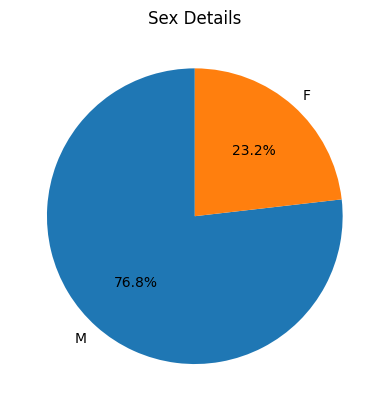

In [43]:
sex_data = dataset.Sex.value_counts()

plt.figure()
plt.pie(sex_data.values, labels=sex_data.index, autopct="%1.1f%%", startangle=90)

plt.title("Sex Details")
plt.show()

In [49]:
len(dataset.Equipment.value_counts())

5

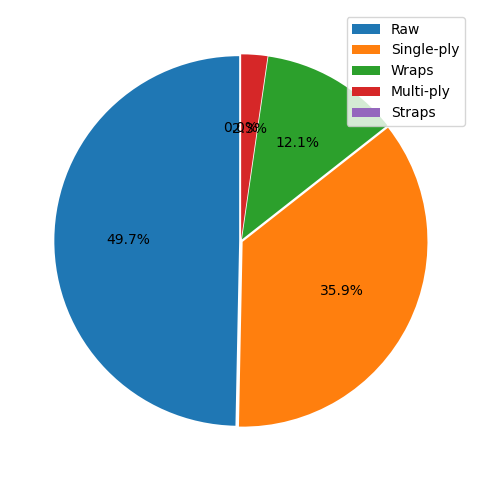

In [61]:
equipment_data = dataset["Equipment"].value_counts()
explode = len(equipment_data) * [0.01]
plt.figure(figsize=(10, 6))
plt.pie(
    equipment_data.values,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode,
    labeldistance=1.1,
    pctdistance=0.6,
    textprops={"fontsize": 10}
)

plt.legend(equipment_data.index, loc='upper right')
plt.title
plt.show()